In [1]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
from tqdm import tqdm
# from cycler import cycler
import matplotlib as mpl
from IPython.display import Markdown, display
    
api = wandb.Api()
project = "feasible-rlhf"
workspace = "hounie"

# Get our two main experiments so far
#experiment_tags = ["first_exp"]

# get all runs that both: 1.  match any experiment tag and 2. are finished
runs = api.runs(f"{workspace}/{project}",
                {"$and": [
                    #{"tags": {"$in": experiment_tags}},
                    {"state": "finished"}
                ]})


In [2]:
split = "val"
all_runs = []
for run in tqdm(runs):
    run_dict = {"algorithm":run.config["algorithm"], "tolerance": run.config["loss_tolerance"]}
    histogram = run.history(keys=[f"eval/{split}_loss/hist"])
    bins = []
    values = []
    steps = []
    for step, h in enumerate(histogram[f"eval/{split}_loss/hist"]):
        bins.append(h["bins"])
        values.append(h["values"])
        steps.append(step)

    run_dict["bins"] = bins
    run_dict["values"] = values
    run_dict["steps"] = steps

    all_runs.append(run_dict)

df = pd.DataFrame(all_runs)

100%|██████████| 12/12 [00:03<00:00,  3.03it/s]


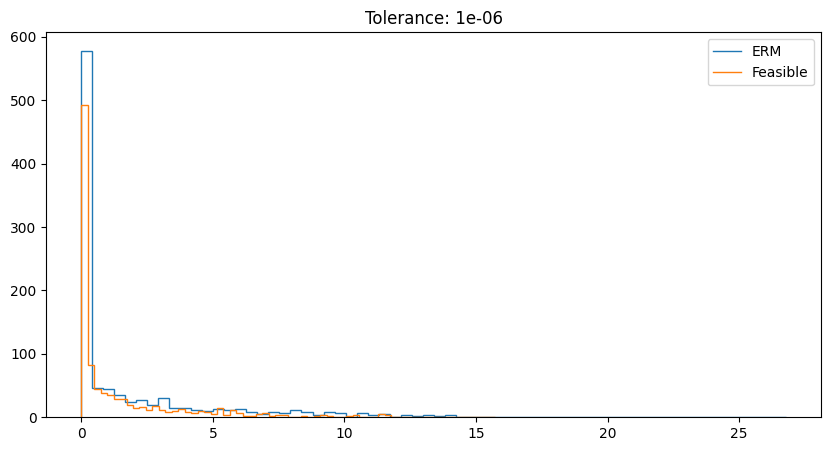

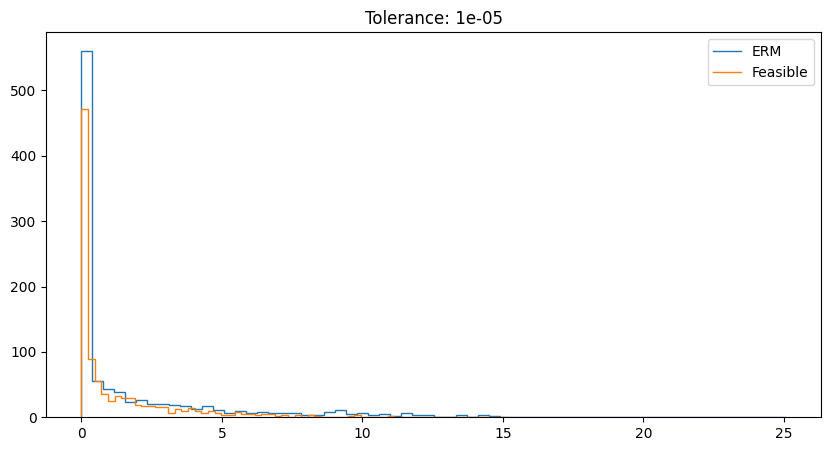

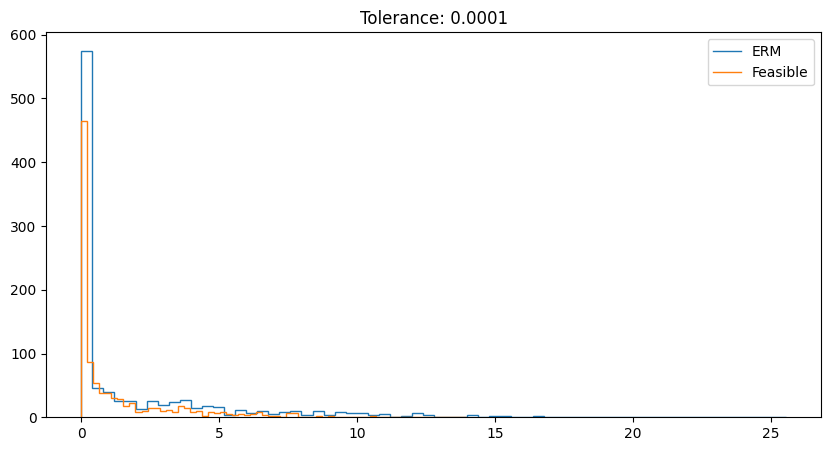

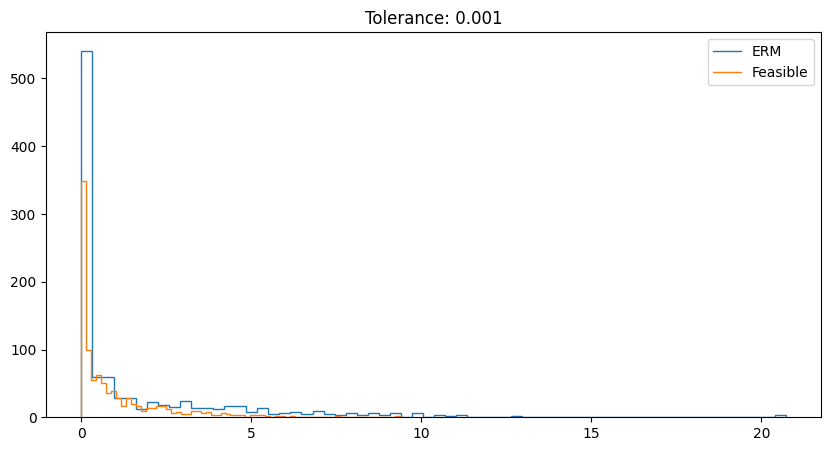

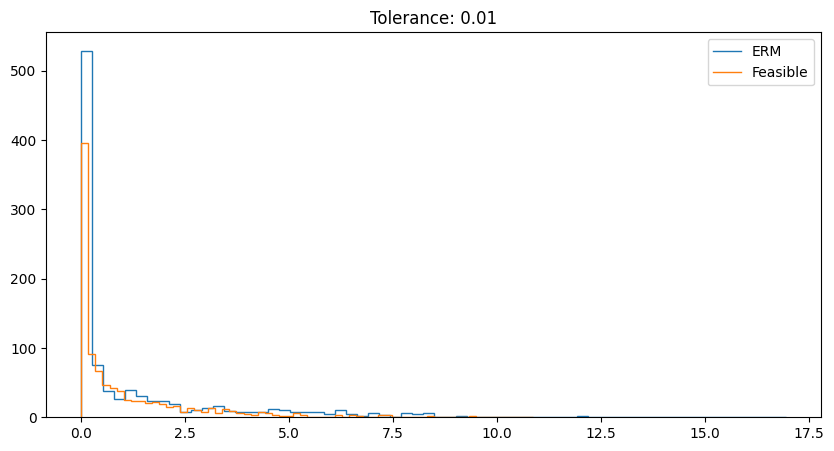

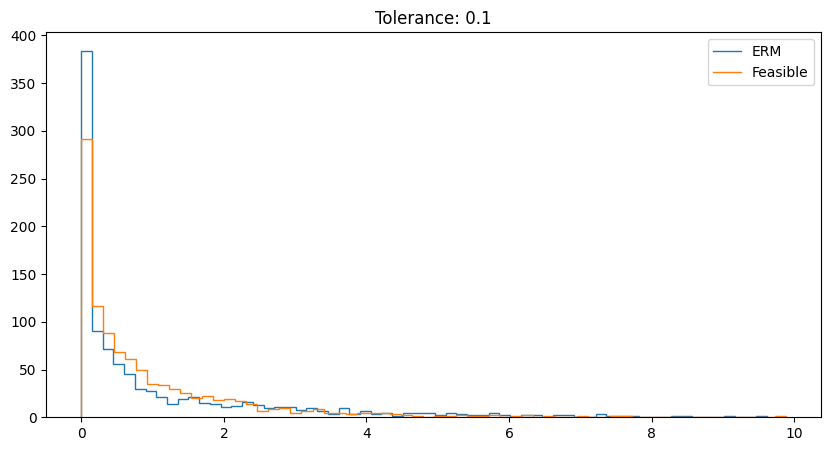

In [3]:
for tolerance, df_t in df.groupby("tolerance"): 
    #print(df_t)
    df_t = df_t.sort_values(by=["steps"])
    erm = df_t[df_t["algorithm"] == "clamped-erm"]
    feas = df_t[df_t["algorithm"] == "rfl"]
    max_steps = df_t["steps"].max()
    for (bins_erm, values_erm), (bins_feas, values_feas) in zip(zip(erm["bins"].values[0], erm["values"].values[0]), zip(feas["bins"].values[0], feas["values"].values[0])):
        values_erm = np.array(values_erm)
        #print(values_erm)
        #print(bins_erm)
        plt.figure(figsize=(10, 5))
        plt.stairs(values_erm, bins_erm, label="ERM")
        plt.stairs(values_feas, bins_feas, label="Feasible")
        plt.title(f"Tolerance: {tolerance}")
        plt.legend()
        plt.show()

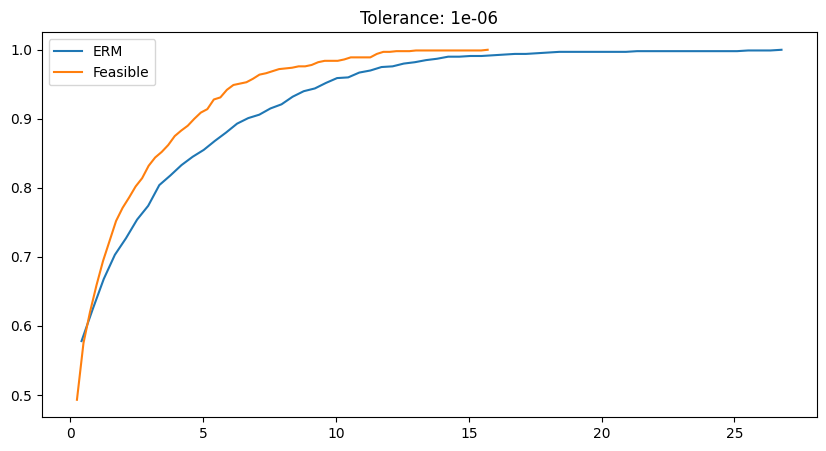

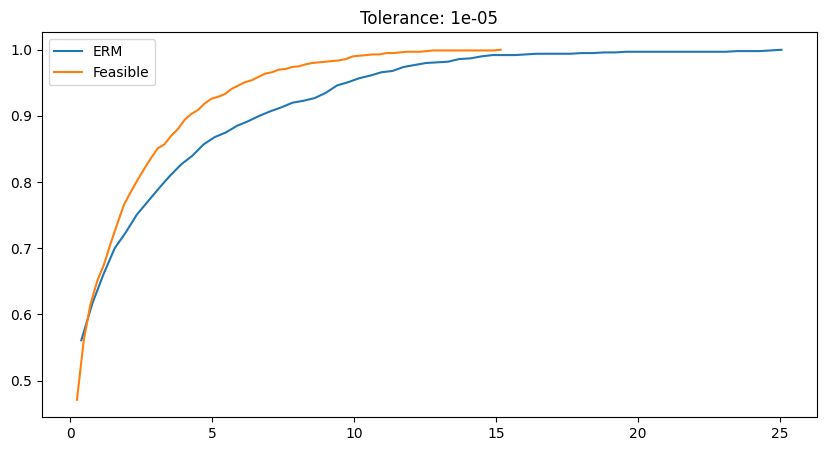

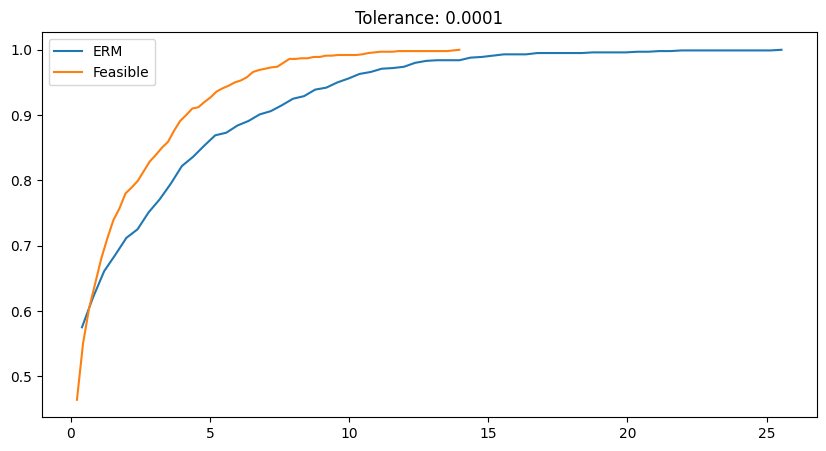

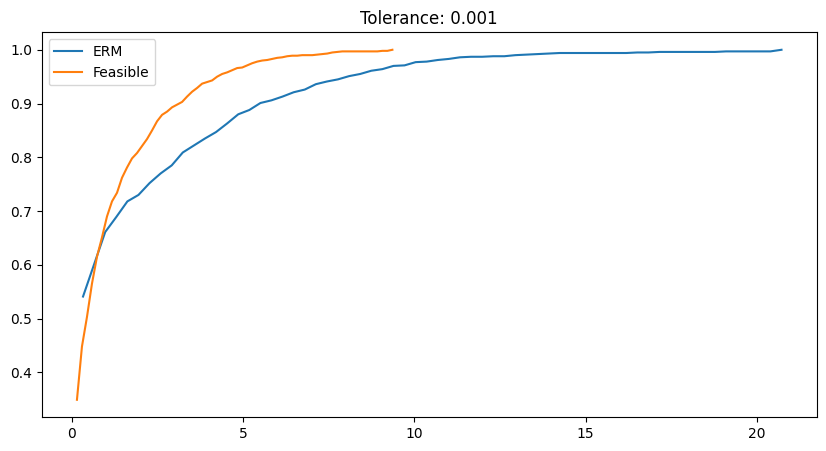

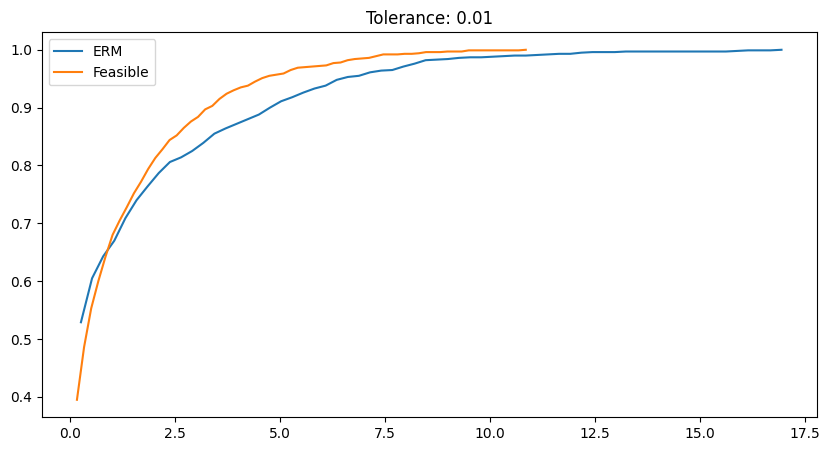

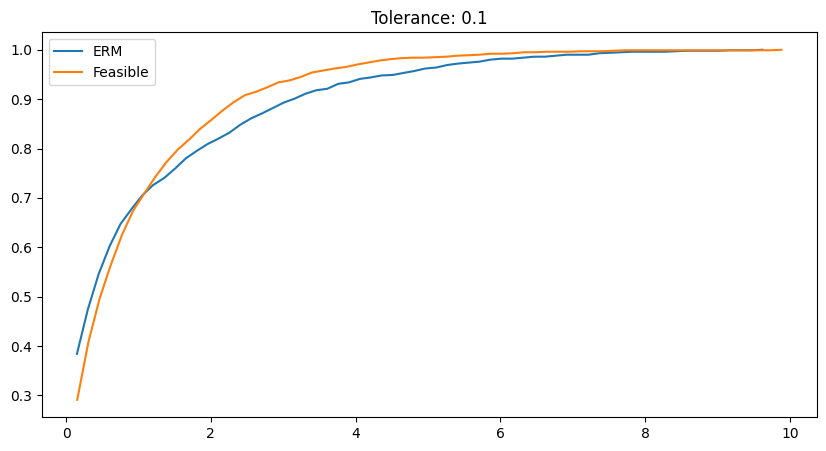

In [4]:
for tolerance, df_t in df.groupby("tolerance"): 
    #print(df_t)
    df_t = df_t.sort_values(by=["steps"])
    erm = df_t[df_t["algorithm"] == "clamped-erm"]
    feas = df_t[df_t["algorithm"] == "rfl"]
    max_steps = df_t["steps"].max()
    for (bins_erm, values_erm), (bins_feas, values_feas) in zip(zip(erm["bins"].values[0], erm["values"].values[0]), zip(feas["bins"].values[0], feas["values"].values[0])):
        values_erm = np.array(values_erm)
        values_feas = np.array(values_feas)
        cdf_erm = np.zeros_like(values_erm, dtype=float)
        cdf_feas = np.zeros_like(values_feas, dtype=float)
        # plot CDF
        for i in range(len(values_erm)):
            cdf_erm[i] = np.sum(values_erm[:i+1])/np.sum(values_erm)
        for i in range(len(values_feas)):
            cdf_feas[i] = np.sum(values_feas[:i+1])/np.sum(values_feas)
        plt.figure(figsize=(10, 5))
        plt.plot(bins_erm[1:], cdf_erm, label="ERM")
        plt.plot(bins_feas[1:], cdf_feas, label="Feasible")
        plt.title(f"Tolerance: {tolerance}")
        #plt.xlim(1.5, 2.6)
    #plt.ylim(0.8, 1.0)
    # plot vertical line
    #plt.axvline(x=0.001, color="red", linestyle="dashed", label="Constraint Level")
        plt.legend()
        plt.show()

In [5]:
split = "train"
all_runs = []
for run in tqdm(runs):
    run_dict = {"algorithm":run.config["algorithm"], "tolerance": run.config["loss_tolerance"]}
    histogram = run.history(keys=[f"eval/{split}_loss/hist"])
    bins = []
    values = []
    steps = []
    for step, h in enumerate(histogram[f"eval/{split}_loss/hist"]):
        bins.append(h["bins"])
        values.append(h["values"])
        steps.append(step)

    run_dict["bins"] = bins
    run_dict["values"] = values
    run_dict["steps"] = steps

    all_runs.append(run_dict)

df = pd.DataFrame(all_runs)
    


100%|██████████| 12/12 [00:04<00:00,  2.93it/s]


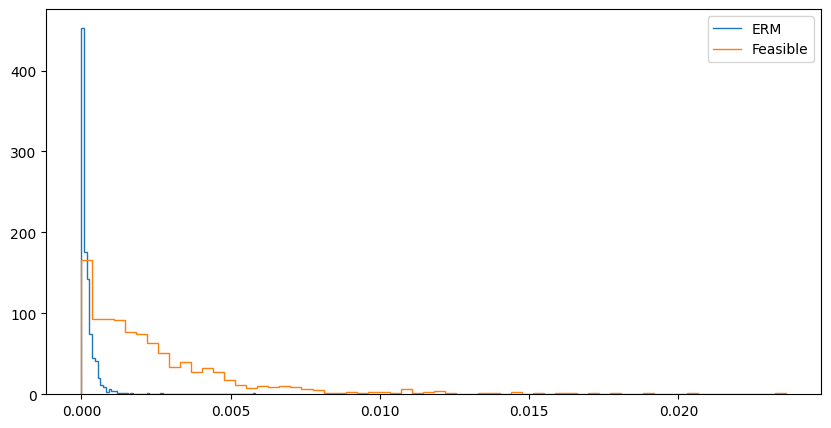

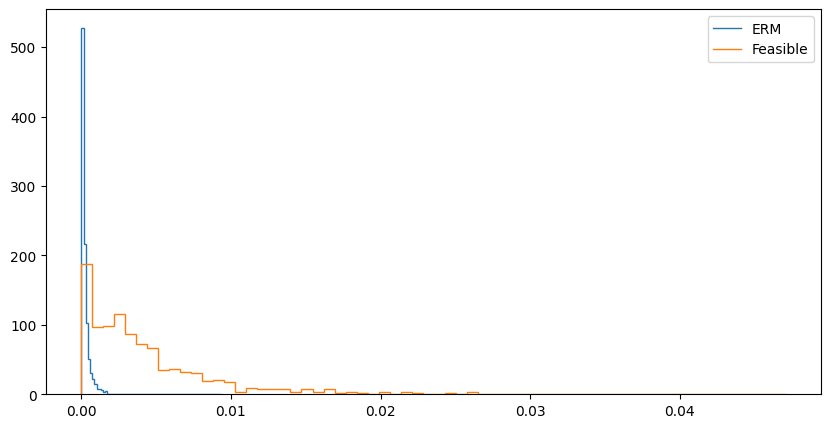

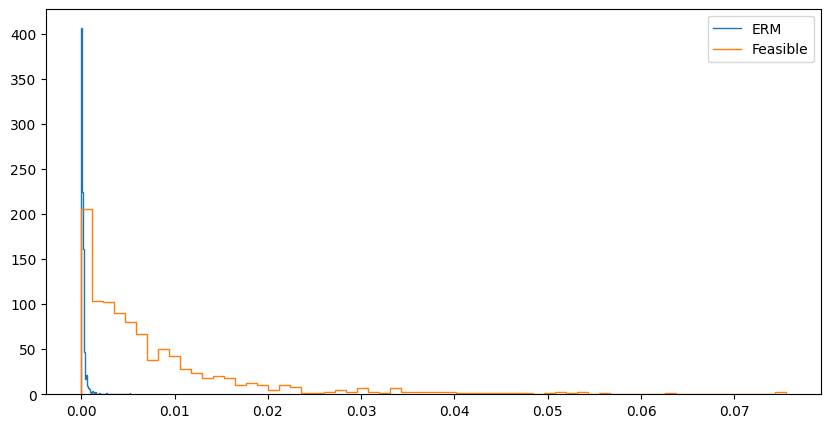

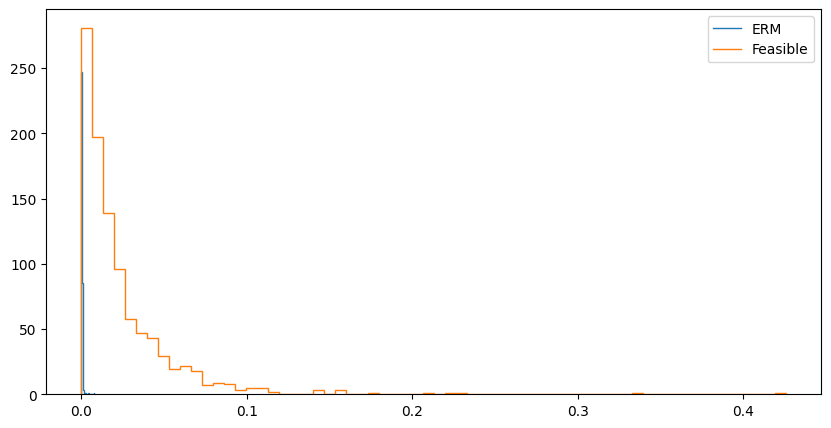

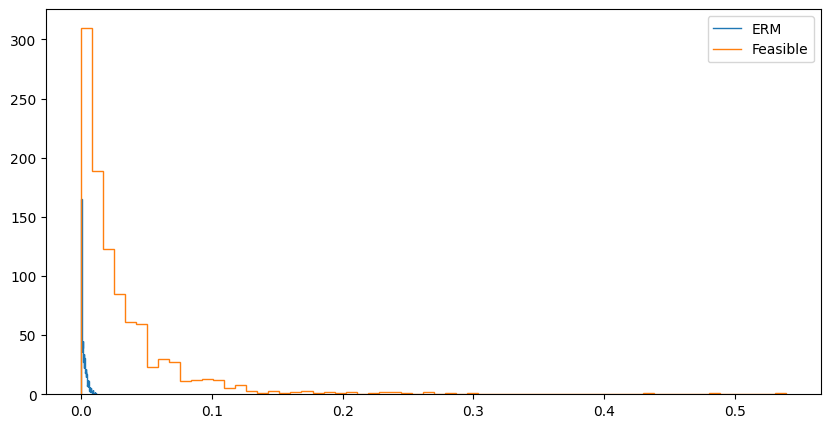

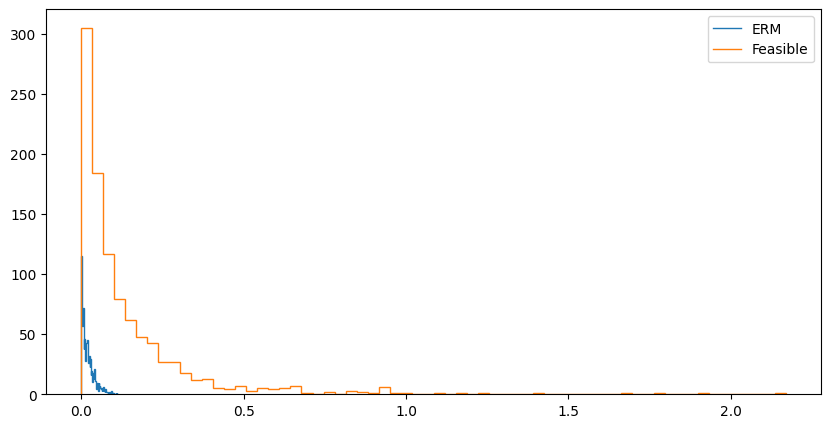

In [6]:
for tolerance, df_t in df.groupby("tolerance"): 
    #print(df_t)
    df_t = df_t.sort_values(by=["steps"])
    erm = df_t[df_t["algorithm"] == "clamped-erm"]
    feas = df_t[df_t["algorithm"] == "rfl"]
    max_steps = df_t["steps"].max()
    for (bins_erm, values_erm), (bins_feas, values_feas) in zip(zip(erm["bins"].values[0], erm["values"].values[0]), zip(feas["bins"].values[0], feas["values"].values[0])):
        values_erm = np.array(values_erm)
        #print(values_erm)
        #print(bins_erm)
        plt.figure(figsize=(10, 5))
        plt.stairs(values_erm, bins_erm, label="ERM")
        plt.stairs(values_feas, bins_feas, label="Feasible")
        #plt.axvline(x=0.001, color="red", linestyle="dashed", label="Constraint Level")
        plt.legend()
        plt.show()

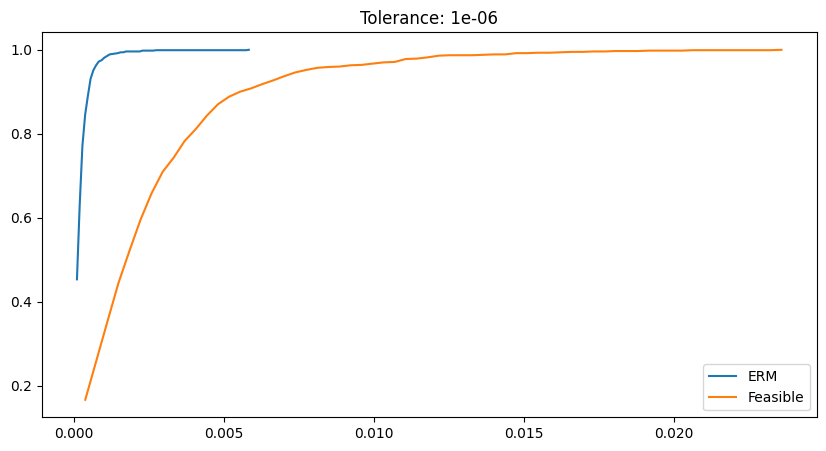

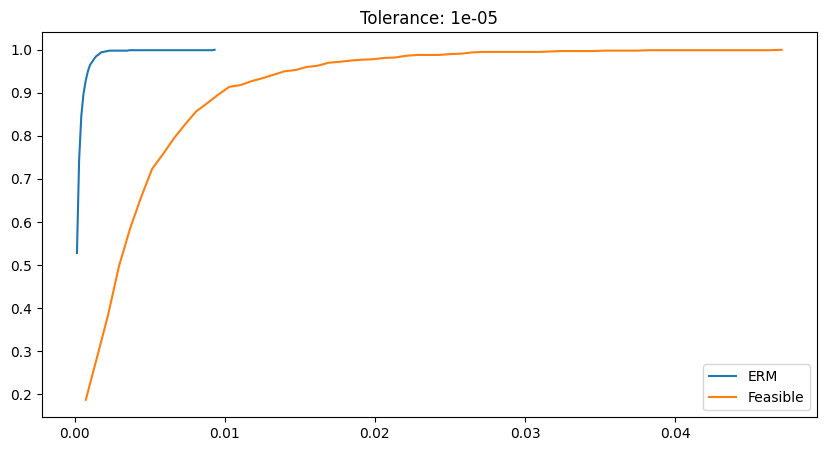

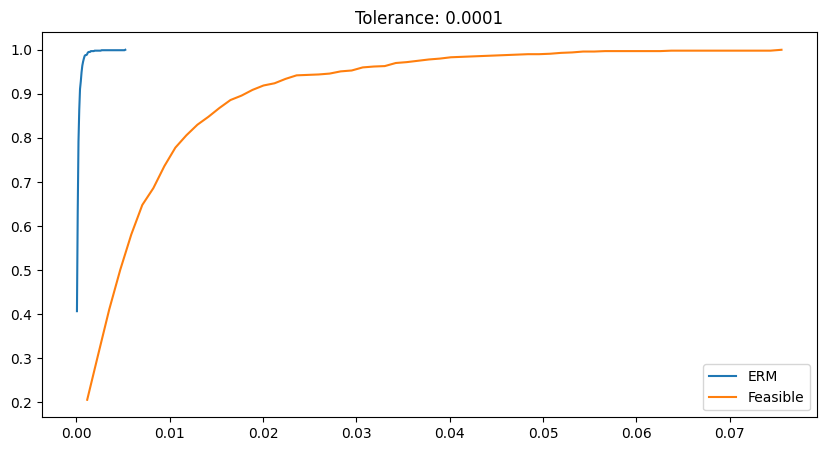

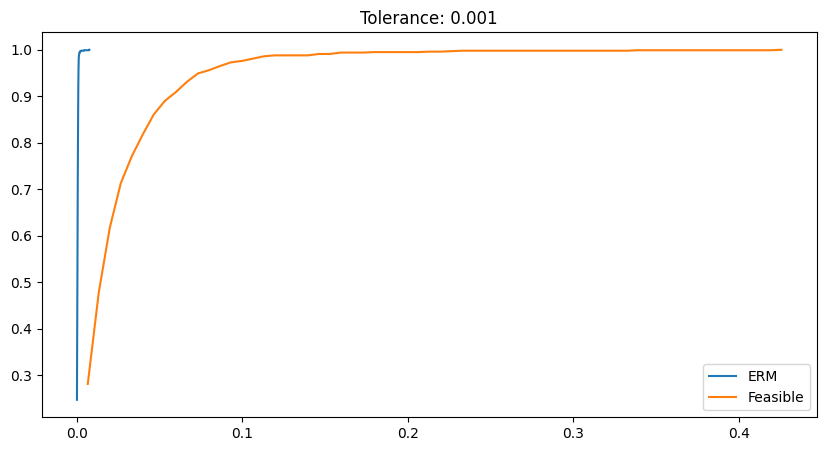

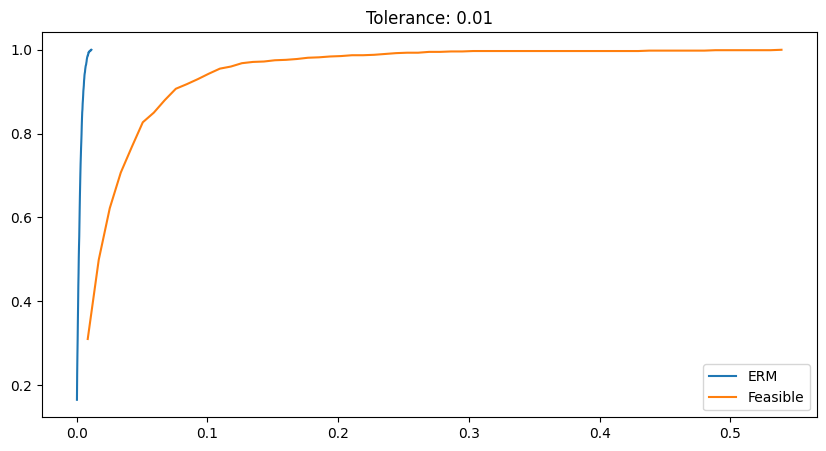

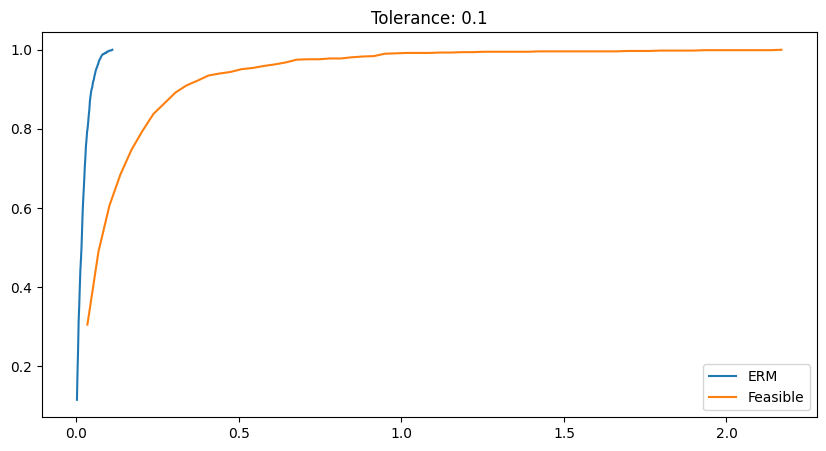

In [7]:
for tolerance, df_t in df.groupby("tolerance"): 
    #print(df_t)
    df_t = df_t.sort_values(by=["steps"])
    erm = df_t[df_t["algorithm"] == "clamped-erm"]
    feas = df_t[df_t["algorithm"] == "rfl"]
    max_steps = df_t["steps"].max()
    for (bins_erm, values_erm), (bins_feas, values_feas) in zip(zip(erm["bins"].values[0], erm["values"].values[0]), zip(feas["bins"].values[0], feas["values"].values[0])):
        values_erm = np.array(values_erm)
        values_feas = np.array(values_feas)
        cdf_erm = np.zeros_like(values_erm, dtype=float)
        cdf_feas = np.zeros_like(values_feas, dtype=float)
        # plot CDF
        for i in range(len(values_erm)):
            cdf_erm[i] = np.sum(values_erm[:i+1])/np.sum(values_erm)
        for i in range(len(values_feas)):
            cdf_feas[i] = np.sum(values_feas[:i+1])/np.sum(values_feas)
        plt.figure(figsize=(10, 5))
        plt.title(f"Tolerance: {tolerance}")
        plt.plot(bins_erm[1:], cdf_erm, label="ERM")
        plt.plot(bins_feas[1:], cdf_feas, label="Feasible")
        #plt.xlim(1.5, 2.6)
        #plt.ylim(0.8, 1.0)
        # plot vertical line
    #plt.axvline(x=0.001, color="red", linestyle="dashed", label="Constraint Level")
    plt.legend()
    plt.show()